In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Load dataset
df = pd.read_csv("sierraleone-bumbuna.csv")  

# Show basic info and first rows
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [2]:
# Summary statistics for numeric columns
print(df.describe())

# Missing values count per column
missing_counts = df.isna().sum()
print(missing_counts)

# Percentage of missing values per column
missing_percent = (missing_counts / len(df)) * 100
print(missing_percent)

# Columns with > 5% missing values
cols_above_5pct_null = missing_percent[missing_percent > 5].index.tolist()
print("Columns with >5% missing values:", cols_above_5pct_null)


                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      201.957515     116.376337     113.720571     206.643095   
std       298.495150     218.652659     158.946032     300.896893   
min       -19.500000      -7.800000     -17.900000       0.000000   
25%        -2.800000      -0.300000      -3.800000       0.000000   
50%         0.300000      -0.100000      -0.100000       3.600000   
75%       362.400000     107.000000     224.700000     359.500000   
max      1499.000000     946.000000     892.000000    1507.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      198.114691      26.319394      79.448857       1.146113   
std       288.889073       4.398605      20.520775       1.239248   
min         0.000000      12.300000       9.900000       0.000000   
25%         0.000000      23.1000

In [3]:
# Code Cell: Outlier detection
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
df_z = df[columns_to_check].apply(zscore)
outliers = (np.abs(df_z) > 3)
print("Outlier counts per column:", outliers.sum())

Outlier counts per column: GHI       2477
DNI       7586
DHI       2986
ModA      1604
ModB      2041
WS        3967
WSgust    3665
dtype: int64


In [4]:
# Replace outliers with NaN then impute with median
df_clean = df.copy()
df_clean[columns_to_check] = df_clean[columns_to_check].mask(outliers)
df_clean[columns_to_check] = df_clean[columns_to_check].fillna(df_clean[columns_to_check].median())



In [5]:
# Export cleaned data
import os


# Export cleaned data
df_clean.to_csv("data/sierraleone-bumbuna_clean.csv", index=False)



In [6]:
# Load cleaned data
df = pd.read_csv('data/sierraleone-bumbuna_clean.csv')

# Convert Timestamp column to datetime if not already
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Set Timestamp as index for time series analysis
df.set_index('Timestamp', inplace=True)

<Figure size 1600x800 with 0 Axes>

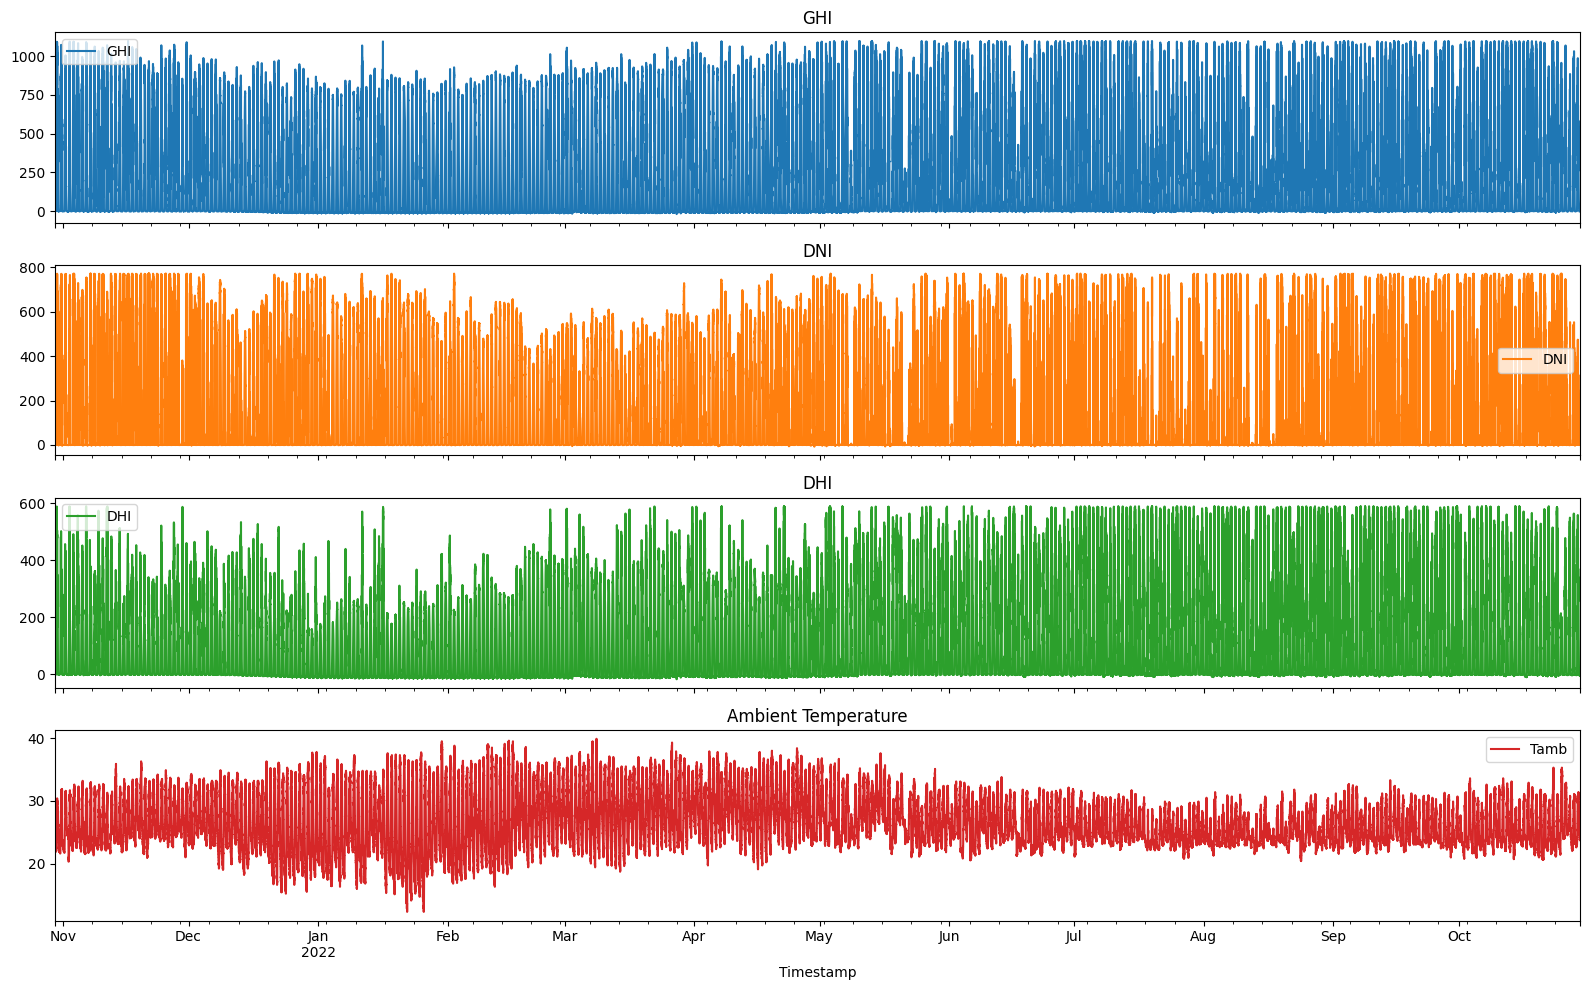

In [7]:
# Plot GHI, DNI, DHI, Tamb over time
plt.figure(figsize=(16, 8))
df[['GHI', 'DNI', 'DHI', 'Tamb']].plot(subplots=True, figsize=(16, 10), title=["GHI", "DNI", "DHI", "Ambient Temperature"])
plt.tight_layout()
plt.show()


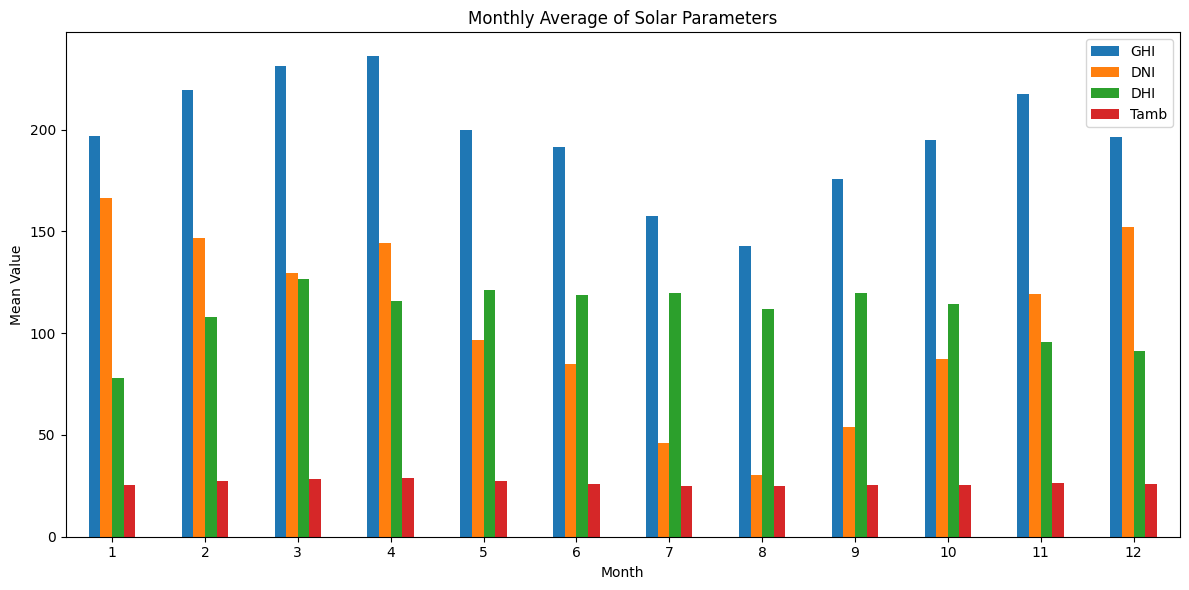

In [8]:
df['Month'] = df.index.month

# Average values per month
monthly_avg = df.groupby('Month')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

# Plot
monthly_avg.plot(kind='bar', figsize=(12, 6), title="Monthly Average of Solar Parameters")
plt.xlabel("Month")
plt.ylabel("Mean Value")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


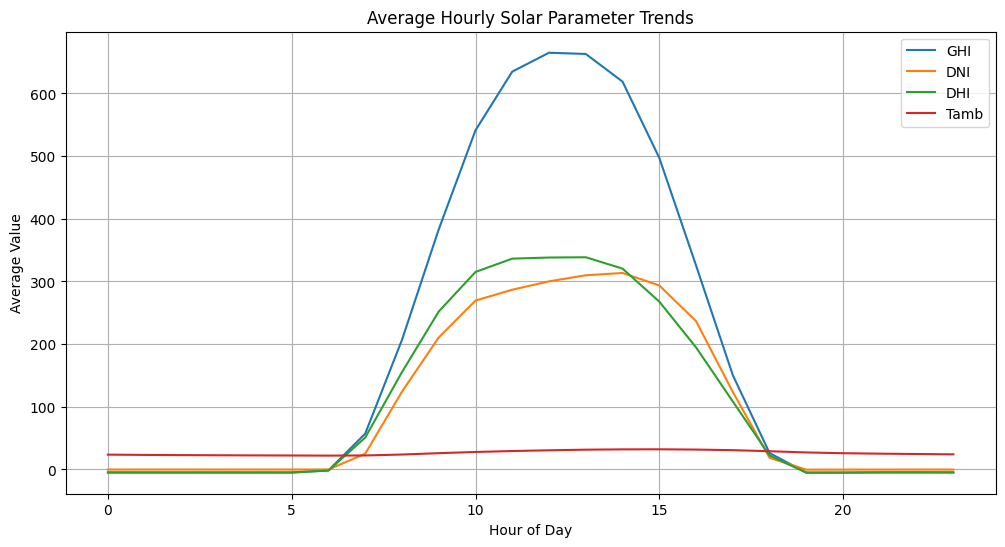

In [10]:
df['Hour'] = df.index.hour

# Average hourly pattern
hourly_avg = df.groupby('Hour')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

# Plot
hourly_avg.plot(figsize=(12, 6), title="Average Hourly Solar Parameter Trends")
plt.xlabel("Hour of Day")
plt.ylabel("Average Value")
plt.grid(True)
plt.show()



In [11]:
from scipy.stats import zscore

# Compute z-scores
z_scores = df[['GHI', 'DNI', 'DHI', 'Tamb']].apply(zscore)

# Mark anomalies where z-score > 3 or < -3
anomalies = (z_scores.abs() > 3)

# Count anomalies per parameter
anomalies.sum()


GHI      885
DNI     7803
DHI     1084
Tamb     192
dtype: int64

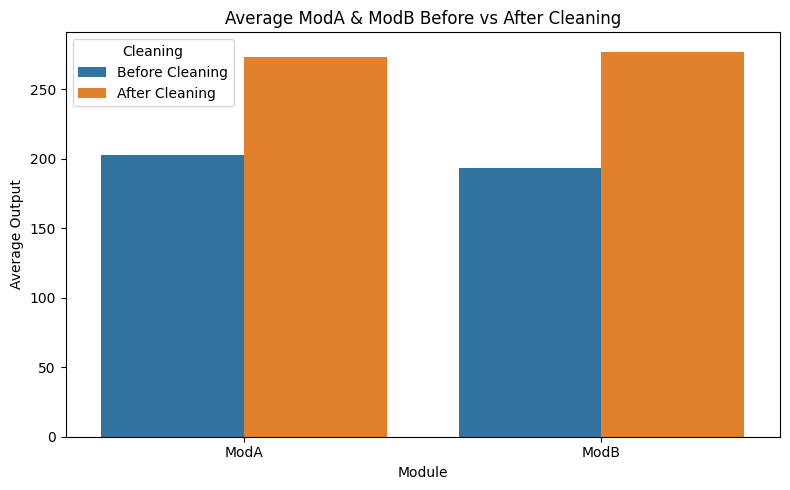

In [12]:
# Group by the cleaning flag
grouped = df_clean.groupby('Cleaning')[['ModA', 'ModB']].mean().reset_index()

# (Optional) Rename for readability
grouped['Cleaning'] = grouped['Cleaning'].map({0: 'Before Cleaning', 1: 'After Cleaning'})

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.barplot(data=grouped.melt(id_vars='Cleaning', value_vars=['ModA', 'ModB']),
            x='variable', y='value', hue='Cleaning')
plt.title('Average ModA & ModB Before vs After Cleaning')
plt.xlabel('Module')
plt.ylabel('Average Output')
plt.tight_layout()
plt.show()


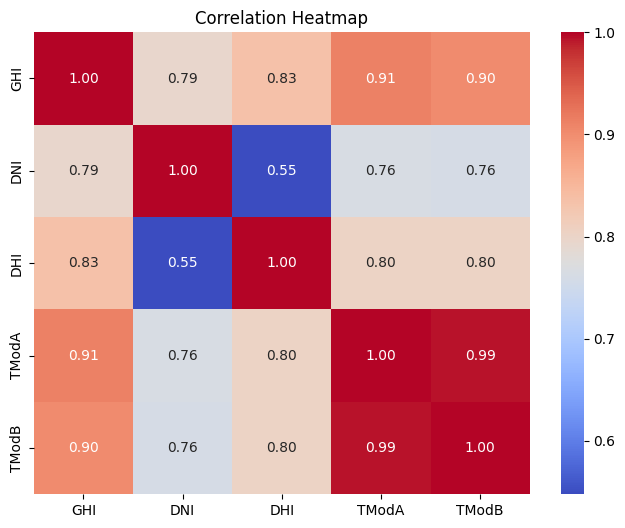

In [13]:
# Heatmap of correlations
# Checking how strongly GHI, DNI, DHI, TModA, and TModB are related.
# Select relevant columns
correlation_columns = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
corr_matrix = df_clean[correlation_columns].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

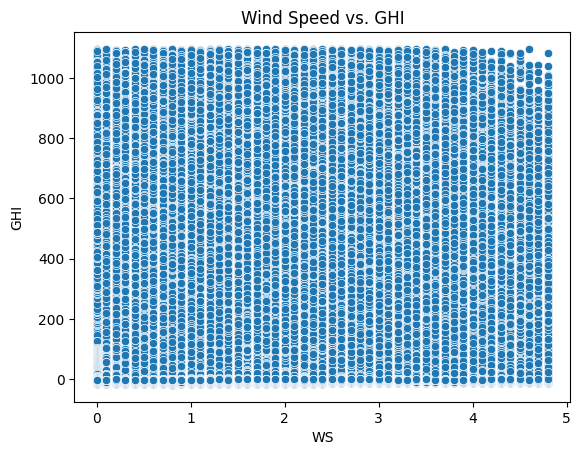

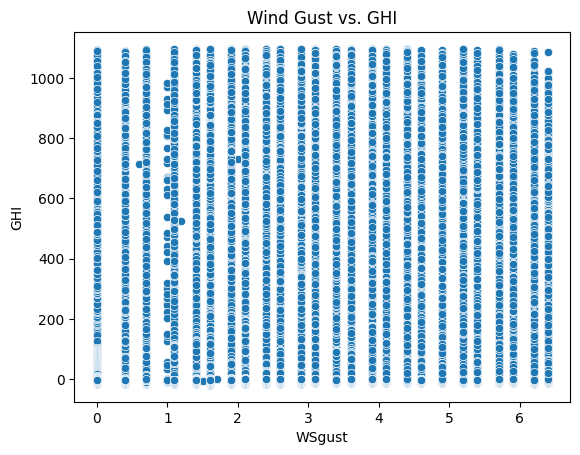

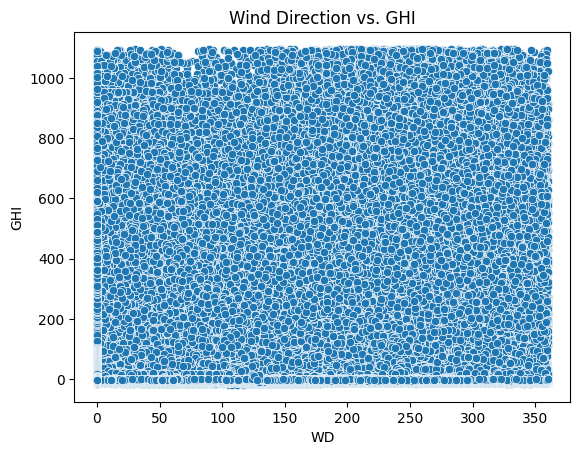

In [14]:

# Wind Speed vs. GHI
sns.scatterplot(data=df_clean, x='WS', y='GHI')
plt.title('Wind Speed vs. GHI')
plt.show()

# Wind Gust vs. GHI
sns.scatterplot(data=df_clean, x='WSgust', y='GHI')
plt.title('Wind Gust vs. GHI')
plt.show()

# Wind Direction vs. GHI
sns.scatterplot(data=df_clean, x='WD', y='GHI')
plt.title('Wind Direction vs. GHI')
plt.show()


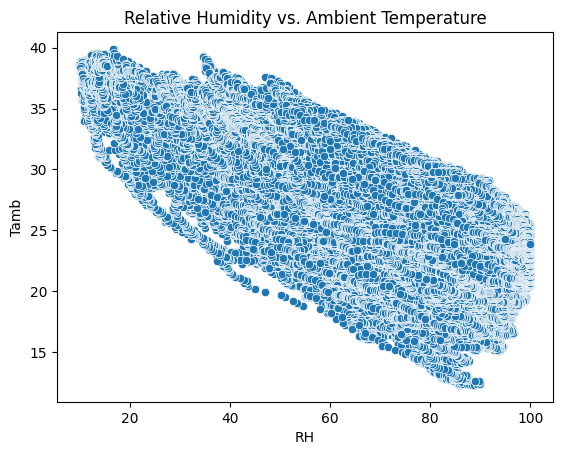

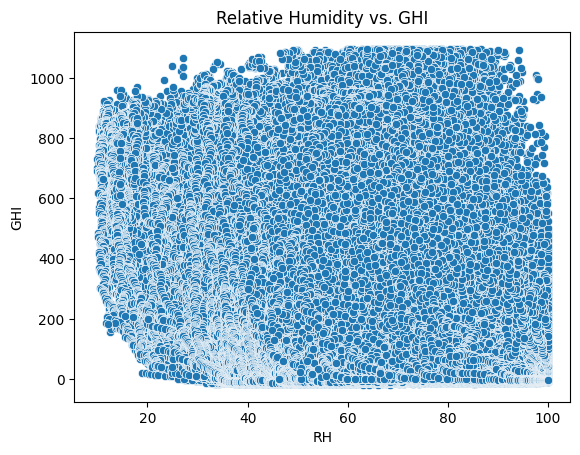

In [15]:
# RH vs. Tamb
sns.scatterplot(data=df_clean, x='RH', y='Tamb')
plt.title('Relative Humidity vs. Ambient Temperature')
plt.show()

# RH vs. GHI
sns.scatterplot(data=df_clean, x='RH', y='GHI')
plt.title('Relative Humidity vs. GHI')
plt.show()


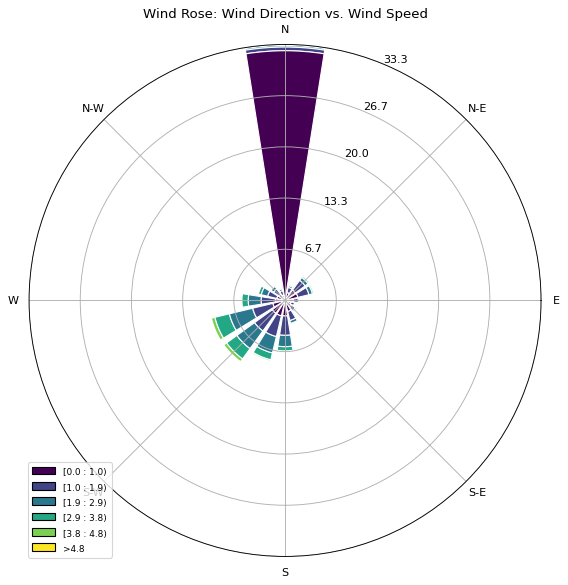

In [16]:
from windrose import WindroseAxes
import matplotlib.pyplot as plt

# Drop rows with missing wind speed/direction
wind_data = df_clean[['WS', 'WD']].dropna()

# Plot wind rose
ax = WindroseAxes.from_ax()
ax.bar(wind_data['WD'], wind_data['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title("Wind Rose: Wind Direction vs. Wind Speed")
plt.show()


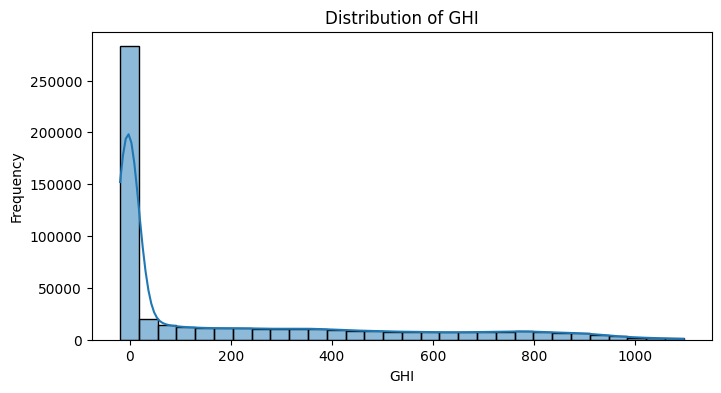

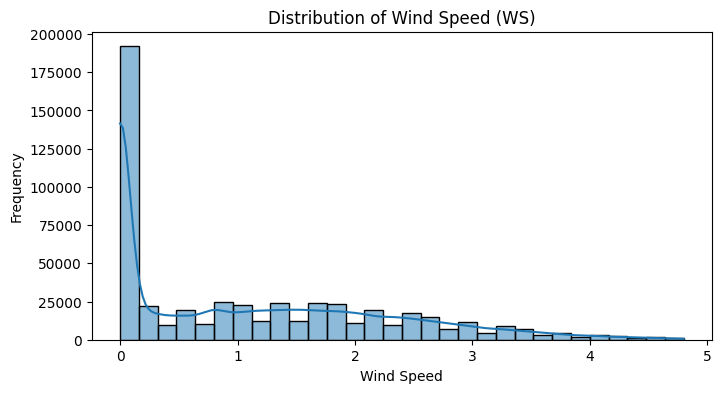

In [17]:


# Histogram for GHI
plt.figure(figsize=(8, 4))
sns.histplot(df_clean['GHI'].dropna(), bins=30, kde=True)
plt.title('Distribution of GHI')
plt.xlabel('GHI')
plt.ylabel('Frequency')
plt.show()

# Histogram for WS
plt.figure(figsize=(8, 4))
sns.histplot(df_clean['WS'].dropna(), bins=30, kde=True)
plt.title('Distribution of Wind Speed (WS)')
plt.xlabel('Wind Speed')
plt.ylabel('Frequency')
plt.show()


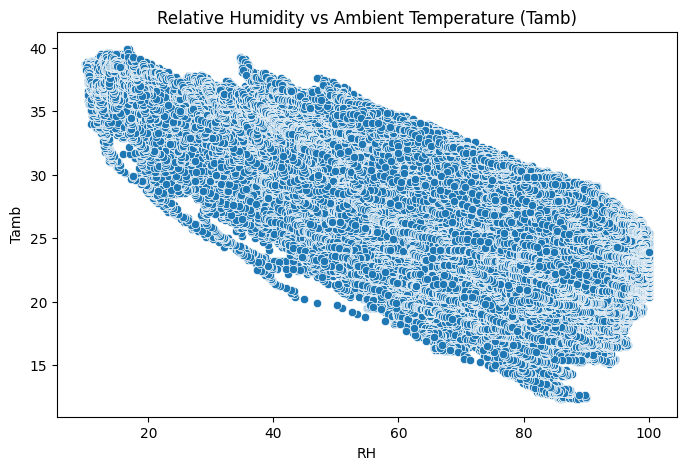

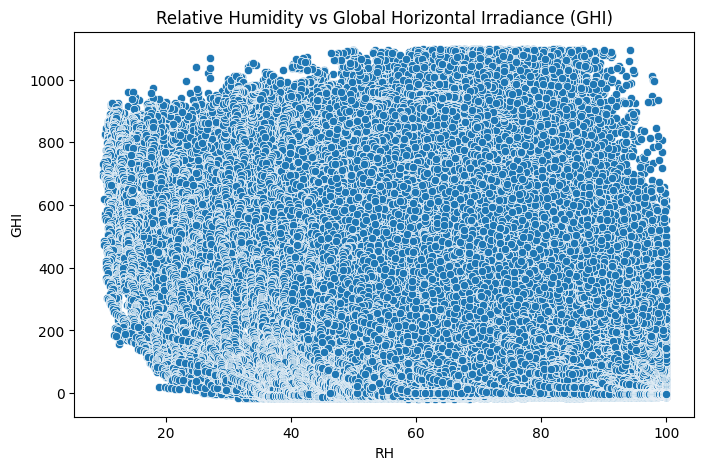

In [18]:
# Scatter plot RH vs. Tamb (ambient temperature)
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_clean, x='RH', y='Tamb')
plt.title('Relative Humidity vs Ambient Temperature (Tamb)')
plt.show()

# Scatter plot RH vs. GHI (Global Horizontal Irradiance)
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_clean, x='RH', y='GHI')
plt.title('Relative Humidity vs Global Horizontal Irradiance (GHI)')
plt.show()

In [19]:
# Calculate and print correlation coefficients
print("Correlation between RH and Tamb:", df_clean['RH'].corr(df_clean['Tamb']))
print("Correlation between RH and GHI:", df_clean['RH'].corr(df_clean['GHI']))


Correlation between RH and Tamb: -0.791936652154722
Correlation between RH and GHI: -0.5556419634116228


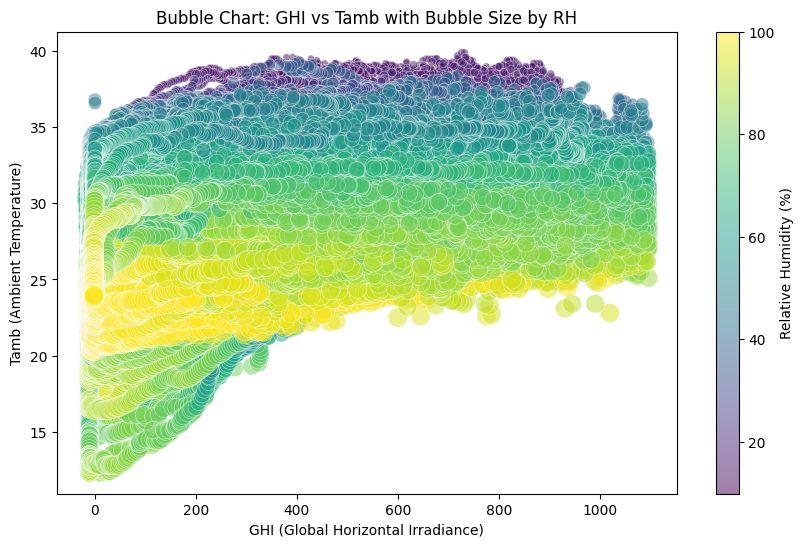

In [20]:
plt.figure(figsize=(10,6))  # Create a figure with specified size (width=10, height=6)

# Create a scatter plot with:
# - x-axis as 'GHI' values
# - y-axis as 'Tamb' values
# - bubble size proportional to 'RH' values scaled by 2
# - bubble transparency set to 0.5
# - bubble color mapped to 'RH' values using the 'viridis' colormap
# - white edges around bubbles with linewidth 0.5
scatter = plt.scatter(df_clean['GHI'], df_clean['Tamb'], 
                      s=df_clean['RH']*2,  
                      alpha=0.5, 
                      c=df_clean['RH'],    
                      cmap='viridis',
                      edgecolors='w',
                      linewidth=0.5)

plt.colorbar(scatter, label='Relative Humidity (%)')  # Add a colorbar to indicate RH values
plt.xlabel('GHI (Global Horizontal Irradiance)')      # Label x-axis
plt.ylabel('Tamb (Ambient Temperature)')              # Label y-axis
plt.title('Bubble Chart: GHI vs Tamb with Bubble Size by RH')  # Add plot title
plt.show()  # Display the plot


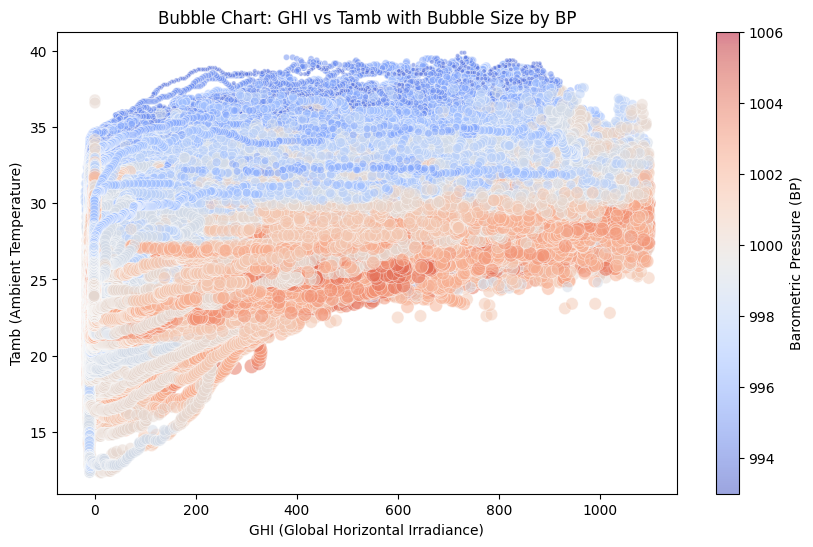

In [21]:
# Set the size of the figure
plt.figure(figsize=(10,6))

# Create a scatter (bubble) plot
scatter = plt.scatter(df_clean['GHI'], df_clean['Tamb'], 
                      s=(df_clean['BP'] - df_clean['BP'].min()) * 10,  # set bubble size based on BP
                      alpha=0.5,                                       # make bubbles semi-transparent
                      c=df_clean['BP'],                                # color bubbles based on BP
                      cmap='coolwarm',                                 # use coolwarm color style
                      edgecolors='w',                                  # set white edges
                      linewidth=0.5)                                   # set edge thickness

# Add a color bar showing BP values
plt.colorbar(scatter, label='Barometric Pressure (BP)')

# Label the x-axis
plt.xlabel('GHI (Global Horizontal Irradiance)')

# Label the y-axis
plt.ylabel('Tamb (Ambient Temperature)')

# Add a title to the chart
plt.title('Bubble Chart: GHI vs Tamb with Bubble Size by BP')

# Show the plot
plt.show()

